CardHeko Data SEt Regrssion Problem for Random Forest 

In [20]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("cars.csv")

# Display the first few rows of the dataset
df.head()



,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [21]:

# Basic information about the dataset
print(df.info())
# print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB
None


In [22]:
# Checking for missing values
df.isnull().sum()

# Data Types of columns
print(df.dtypes)

Unnamed: 0             int64
car_name              object
brand                 object
model                 object
vehicle_age            int64
km_driven              int64
seller_type           object
fuel_type             object
transmission_type     object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
selling_price          int64
dtype: object


In [23]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [24]:
df.drop('car_name' , axis =1 ,inplace=True)
df.drop('brand' , axis =1 ,inplace=True)
df.drop('Unnamed: 0' , axis =1 ,inplace=True)

In [25]:
# Getting all Numeric Features 

num_features = [feature for feature in df.columns if df[feature].dtype != 'object' ]

print(num_features)
print(len(num_features))

['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
7


In [26]:
df['model']

0            Alto
1           Grand
2             i20
3            Alto
4        Ecosport
           ...   
15406         i10
15407      Ertiga
15408       Rapid
15409      XUV500
15410        City
Name: model, Length: 15411, dtype: object

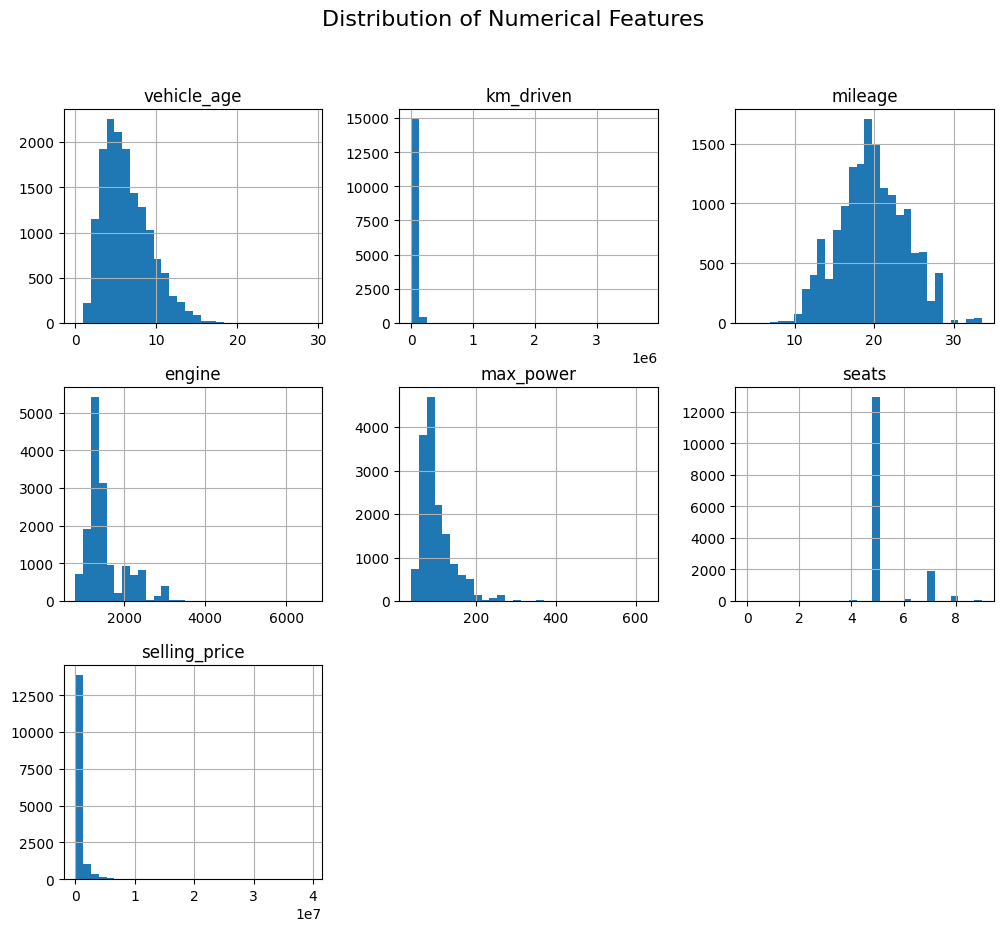

In [27]:

# Univariate Analysis - Distribution of numerical features
numerical_columns = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
df[numerical_columns].hist(figsize=(12, 10), bins=30)
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()


In [28]:

# # Boxplots for detecting outliers in numerical columns
# plt.figure(figsize=(12, 8))
# for i, column in enumerate(numerical_columns):
#     plt.subplot(3, 3, i+1)
#     sns.boxplot(x=df[column])
#     plt.title(column)

# plt.tight_layout()
# plt.show()

In [29]:
# # Bivariate Analysis - Correlation heatmap for numerical variables
# plt.figure(figsize=(10, 8))
# sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Heatmap')
# plt.show()


In [30]:

# Checking the final dataset after encoding
df.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [31]:
from sklearn.model_selection import train_test_split 

x = df.drop(['selling_price'],axis = 1)
y= df['selling_price']

Encoding And Scaling 

In [32]:
# Importing LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder

# Creating a LabelEncoder instance
label_encoder = LabelEncoder()

# Applying LabelEncoder to the 'model' column
x['model'] = label_encoder.fit_transform(df['model'])



In [33]:
df['model'].value_counts()

model
i20            906
Swift Dzire    890
Swift          781
Alto           778
City           757
              ... 
Ghibli           1
Altroz           1
GTC4Lusso        1
Aura             1
Gurkha           1
Name: count, Length: 120, dtype: int64

In [34]:
# Creating Column Transformers with 3 types of Transformers
num_features = x.select_dtypes( exclude= 'object').columns
onehot_columns = ['seller_type'	,'fuel_type'	,'transmission_type'	]
from sklearn.preprocessing import OneHotEncoder , StandardScaler

# For handling Multiple Transformers like OneHotEncoder , StandardScaler We Use ColumnTransformer

from sklearn.compose import ColumnTransformer

numeric_teansformers = StandardScaler()
oh_transformers = OneHotEncoder(drop = "first")

preprocessor = ColumnTransformer(
[
    ("OneHotEncoder" , oh_transformers,onehot_columns),
    ('StandardScaler',numeric_teansformers,num_features)
],remainder='passthrough'
)

In [35]:
x = preprocessor.fit_transform(x)

In [36]:
x_train , x_test ,y_train ,y_test = train_test_split(x,y , test_size= 0.2 , random_state=42)
x_train .shape

(12328, 14)

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression , Ridge ,Lasso

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

In [47]:
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Linear Regression' : LinearRegression(),
    'GradientBoostingRegressor' : GradientBoostingRegressor(),
    'AdaBoost Regressor' :AdaBoostRegressor(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    "Random Forest" : RandomForestRegressor()
}
# LOop To iterat over all the Respective Modles
for i in range(len(list(models))):
    model = list(models.values())[i]# Iterating over models
    model.fit(x_train , y_train)
    # Make Predictions 
    y_train_pred  = model.predict(x_train)
    y_test_pred  = model.predict(x_test)


    acc_score1 = mean_squared_error(y_train,y_train_pred)
    f11 = mean_absolute_error(y_train,y_train_pred)
    pr1 = r2_score(y_train,y_train_pred)

    acc_score = mean_squared_error(y_test,y_test_pred)
    f1 = mean_absolute_error(y_test,y_test_pred)
    pr = r2_score(y_test,y_test_pred)

    print(list(models.keys())[i])
    # Trainig Set Performance 
    print('Trainig Set Performance ')

    print('mean_squared_error : {:.4f}'.format(acc_score))
    print('mean_absolute_error:  {:.4f}'.format(f1))
    print('r2_score : {:.4f}'.format(pr))

    print('--------------------------')
    # Test Set Performance 
    print('Test Set Performance ')



    print('mean_squared_error : {:.4f}'.format(acc_score1))
    print('mean_absolute_error : {:.4f}'.format(f11))
    print('r2_score : {:.4f}'.format(pr1))

    print('='*35)
    print('\n')


Decision Tree
Trainig Set Performance 
mean_squared_error : 92465586008.1495
mean_absolute_error:  124198.7972
r2_score : 0.8772
--------------------------
Test Set Performance 
mean_squared_error : 432524990.5364
mean_absolute_error : 5164.8199
r2_score : 0.9995


Linear Regression
Trainig Set Performance 
mean_squared_error : 252550062888.5656
mean_absolute_error:  279618.5794
r2_score : 0.6645
--------------------------
Test Set Performance 
mean_squared_error : 306756099359.7596
mean_absolute_error : 268101.6071
r2_score : 0.6218


GradientBoostingRegressor
Trainig Set Performance 
mean_squared_error : 65496684244.4898
mean_absolute_error:  126452.7374
r2_score : 0.9130
--------------------------
Test Set Performance 
mean_squared_error : 42002252335.7090
mean_absolute_error : 111709.5558
r2_score : 0.9482


AdaBoost Regressor
Trainig Set Performance 
mean_squared_error : 212724097411.4966
mean_absolute_error:  317394.5831
r2_score : 0.7174
--------------------------
Test Set Perfo

Hyperparameter Tuning 

In [41]:
#  Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],          # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],      # Learning rate shrinks contribution of each tree
    'max_depth': [3, 4, 5],                 # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum samples required to be at a leaf node
    'subsample': [0.8, 1.0]                 # Fraction of samples used for fitting the individual base learners
}


In [42]:
randomcv_models = [
    ("GradientBoostingRegressor" ,GradientBoostingRegressor() ,param_grid)
]

In [43]:
from sklearn.model_selection import RandomizedSearchCV 

model_params ={}



# Iterate over the models and perform RandomizedSearchCV
for name, model, rf_params in randomcv_models:
    print(f"Tuning hyperparameters for {name}...")
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=rf_params,
        n_iter=100,  # Number of random combinations to try
        cv=3,  # 5-fold cross-validation
        verbose=2,
        n_jobs=-1
    )
    random_search.fit(x_train, y_train)  # Train the model

    # Save the best model and its parameters
    rf_params[name] = {
        'best_model': random_search.best_estimator_,
        'best_params': random_search.best_params_,
        'best_score': random_search.best_score_
    }
    print(f"Best Parameters for {name}: {random_search.best_params_}")
    print(f"Best Cross-Validation Score for {name}: {random_search.best_score_}")

# Evaluate the best models on the test set
print("\n--- Final Test Set Performance ---")
for name in model_params:
    best_model = model_params[name]['best_model']
    y_test_pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    print(f"{name}: Test Set Accuracy = {accuracy:.4f}")




Tuning hyperparameters for GradientBoostingRegressor...
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters for GradientBoostingRegressor: {'subsample': 1.0, 'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.1}
Best Cross-Validation Score for GradientBoostingRegressor: 0.8776650663031962

--- Final Test Set Performance ---


In [46]:
models = {
    'GradientBoostingRegressor' :GradientBoostingRegressor(subsample=1.0, n_estimators= 150, min_samples_split= 2, min_samples_leaf=1, max_depth=5, learning_rate =0.1)

}
# LOop To iterat over all the Respective Modles
for i in range(len(list(models))):
    model = list(models.values())[i]# Iterating over models
    model.fit(x_train , y_train)
    # Make Predictions 
    y_train_pred  = model.predict(x_train)
    y_test_pred  = model.predict(x_test)


    acc_score1 = mean_squared_error(y_train,y_train_pred)
    f11 = mean_absolute_error(y_train,y_train_pred)
    pr1 = r2_score(y_train,y_train_pred)

    acc_score = mean_squared_error(y_test,y_test_pred)
    f1 = mean_absolute_error(y_test,y_test_pred)
    pr = r2_score(y_test,y_test_pred)

    print(list(models.keys())[i])
    # Trainig Set Performance 
    print('Trainig Set Performance ')

    print('mean_squared_error : {:.4f}'.format(acc_score))
    print('mean_absolute_error:  {:.4f}'.format(f1))
    print('r2_score : {:.4f}'.format(pr))

    print('--------------------------')
    # Test Set Performance 
    print('Test Set Performance ')



    print('mean_squared_error : {:.4f}'.format(acc_score1))
    print('mean_absolute_error : {:.4f}'.format(f11))
    print('r2_score : {:.4f}'.format(pr1))

    print('='*35)
    print('\n')


GradientBoostingRegressor
Trainig Set Performance 
mean_squared_error : 46220212614.3341
mean_absolute_error:  101068.3561
r2_score : 0.9386
--------------------------
Test Set Performance 
mean_squared_error : 14057804158.8387
mean_absolute_error : 78281.7827
r2_score : 0.9827


